In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/Users/sapna/Desktop/ML-practice/Data.csv')

In [3]:
data=pd.DataFrame(df)

In [4]:
data['Age']=data['Age'].fillna(data['Age'].mean()).astype(int)
data['Salary']=data['Salary'].fillna(data['Salary'].mean()).astype(int)
data

,Country,Age,Salary,Purchased
0,France,44,72000,No
1,Spain,27,48000,Yes
2,Germany,30,54000,No
3,Spain,38,61000,No
4,Germany,40,63777,Yes
5,France,35,58000,Yes
6,Spain,38,52000,No
7,France,48,79000,Yes
8,Germany,50,83000,No
9,France,37,67000,Yes


# Lets try linear regression 

In [5]:
# Changing the country categories with one hot encoding into binary variables
from sklearn.preprocessing import OneHotEncoder


In [6]:
encoder=OneHotEncoder(sparse_output=False)

In [7]:
encoded_data=encoder.fit_transform(data[['Country']])

In [8]:
encoded_df=pd.DataFrame(encoded_data, columns= encoder.get_feature_names_out(['Country']))
encoded_df

,Country_France,Country_Germany,Country_Spain
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,0.0,1.0,0.0
3,0.0,0.0,1.0
4,0.0,1.0,0.0
5,1.0,0.0,0.0
6,0.0,0.0,1.0
7,1.0,0.0,0.0
8,0.0,1.0,0.0
9,1.0,0.0,0.0


In [9]:
final_data=pd.concat([data, encoded_df], axis=1)
final_data=final_data.drop('Country', axis=1)
final_data=final_data.drop('Purchased', axis=1)

In [10]:
final_data

,Age,Salary,Country_France,Country_Germany,Country_Spain
0,44,72000,1.0,0.0,0.0
1,27,48000,0.0,0.0,1.0
2,30,54000,0.0,1.0,0.0
3,38,61000,0.0,0.0,1.0
4,40,63777,0.0,1.0,0.0
5,35,58000,1.0,0.0,0.0
6,38,52000,0.0,0.0,1.0
7,48,79000,1.0,0.0,0.0
8,50,83000,0.0,1.0,0.0
9,37,67000,1.0,0.0,0.0


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
model=LinearRegression()
X=final_data[['Age','Country_France','Country_Germany','Country_Spain']]
Y=final_data[['Salary']]
X_train, X_test, Y_train,Y_test=train_test_split(X, Y, test_size=0.2, random_state=42)


In [12]:
X_train

,Age,Country_France,Country_Germany,Country_Spain
5,35,1.0,0.0,0.0
0,44,1.0,0.0,0.0
7,48,1.0,0.0,0.0
2,30,0.0,1.0,0.0
9,37,1.0,0.0,0.0
4,40,0.0,1.0,0.0
3,38,0.0,0.0,1.0
6,38,0.0,0.0,1.0


In [13]:
Y_train

,Salary
5,58000
0,72000
7,79000
2,54000
9,67000
4,63777
3,61000
6,52000


In [14]:
X_test

,Age,Country_France,Country_Germany,Country_Spain
8,50,0.0,1.0,0.0
1,27,0.0,0.0,1.0


# Check if the relationshop is linear


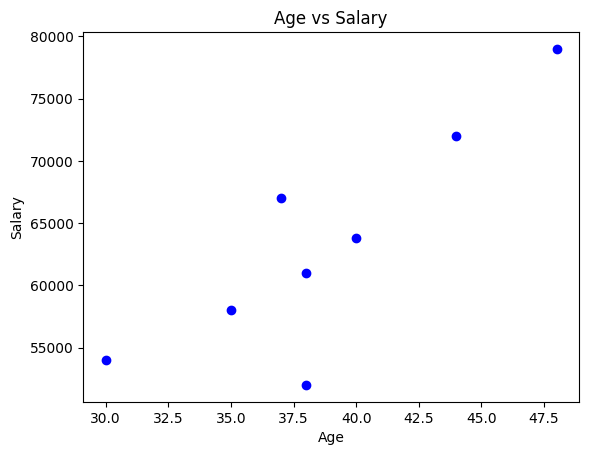

In [15]:
plt.scatter(X_train["Age"], Y_train, color="blue")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.title("Age vs Salary")
plt.show()


In [16]:
linear_regression=model.fit(X_train, Y_train)

In [17]:
result=model.predict(X_test)
result=pd.DataFrame(result)
result.columns=['Predictions']

In [18]:
result

,Predictions
0,77815.21875
1,42620.40625


In [19]:
result = result.reset_index(drop=True)
Y_test = Y_test.reset_index(drop=True)
compare=pd.concat([result, Y_test], axis=1)

In [20]:
compare

,Predictions,Salary
0,77815.21875,83000
1,42620.40625,48000


# Support vector regression


First we need to do feature scaling: If one feature ranges from 1 to 100 while another ranges from 10,000 to 100,000, the latter dominates the distance calculation. Without scaling, features with larger magnitudes can disproportionately influence model predictions.

In [21]:
print(X_train)
print(X_test)
print(Y_train)
print(Y_test)

   Age  Country_France  Country_Germany  Country_Spain
5   35             1.0              0.0            0.0
0   44             1.0              0.0            0.0
7   48             1.0              0.0            0.0
2   30             0.0              1.0            0.0
9   37             1.0              0.0            0.0
4   40             0.0              1.0            0.0
3   38             0.0              0.0            1.0
6   38             0.0              0.0            1.0
   Age  Country_France  Country_Germany  Country_Spain
8   50             0.0              1.0            0.0
1   27             0.0              0.0            1.0
   Salary
5   58000
0   72000
7   79000
2   54000
9   67000
4   63777
3   61000
6   52000
   Salary
0   83000
1   48000


In [22]:
from sklearn.preprocessing import StandardScaler 

In [23]:
sc_X=StandardScaler()
sc_Y=StandardScaler()

In [24]:
X_train_sc=sc_X.fit_transform(X_train[['Age']])

In [25]:
Y_train_sc=sc_Y.fit_transform(Y_train)

In [26]:
Y_train_sc

array([[-0.62602675],
       [ 1.01305491],
       [ 1.83259575],
       [-1.0943358 ],
       [ 0.4276686 ],
       [ 0.05032859],
       [-0.27479497],
       [-1.32849033]])

In [27]:
X_test_sc=sc_X.transform(X_test[['Age']])

In [28]:
Y_test_sc=sc_Y.transform(Y_test)

In [29]:
print(X_train_sc)
print(Y_train_sc)
print(X_test_sc)
print(Y_test_sc)

[[-0.73279795]
 [ 1.02591713]
 [ 1.80756828]
 [-1.70986189]
 [-0.34197238]
 [ 0.24426598]
 [-0.14655959]
 [-0.14655959]]
[[-0.62602675]
 [ 1.01305491]
 [ 1.83259575]
 [-1.0943358 ]
 [ 0.4276686 ]
 [ 0.05032859]
 [-0.27479497]
 [-1.32849033]]
[[ 2.19839386]
 [-2.29610025]]
[[ 2.3009048 ]
 [-1.79679937]]


In [30]:
from sklearn.svm import SVR

In [31]:
regressor=SVR(kernel='rbf') # we can choose any kernel, this one is recommended

In [32]:
regressor.fit(X_train_sc, Y_train_sc)

/Users/sapna/practive-env/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [33]:
sc_Y.inverse_transform(regressor.predict(X_test_sc).reshape(-1, 1))

array([[72284.46053231],
       [57881.97196462]])

# Decision Tree Regression


In [37]:
dt=pd.read_csv('/Users/sapna/Desktop/ML-practice/Position_Salaries.csv')

In [49]:
X_dt=dt.iloc[:,1:-1].values
Y_dt=dt.iloc[:,-1].values

In [53]:
from sklearn.tree import DecisionTreeRegressor
reg_dt = DecisionTreeRegressor(random_state=0)
reg_dt.fit(X_dt, Y_dt)

DecisionTreeRegressor(random_state=0)

In [60]:
reg_dt.predict([[6.5]])

array([150000.])

# Random Forest Regression 

In [62]:
from sklearn.ensemble import RandomForestRegressor
reg_rf=RandomForestRegressor(n_estimators=10, random_state=0)
reg_rf.fit(X_dt,Y_dt)

RandomForestRegressor(n_estimators=10, random_state=0)

In [63]:
reg_rf.predict([[6.5]])

array([167000.])